<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/svm_sigmoid96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Total number of images in the dataset: 144
Number of images in the training set: 460
Number of images in the testing set: 116

Train file names:
CCH-N-018-8-ankle-SR2.jpg - Train
CCH-N-018-8-ankle-SL2.jpg - Train
CCH-N023-8-ankle-FR1.jpg - Train
CCH-N023-8-ankle-FL2.jpg - Train
CCH-N-024-8-ankle-FL1.jpg - Train
CCH-N-024-8-ankle-FR1.jpg - Train
CCH-N-025-8-ankle-FR1.jpg - Train
CCH-N-025-8-ankle-FL1.jpg - Train
CCH-N-026-8-ankle-FR1.jpg - Train
CCH-N-026-8-ankle-SR2.jpg - Train
CCH-N-026-8-ankle-FL3.jpg - Train
CCH-N-026-8-ankle-SL4.jpg - Train
CCH-N-027-8-ankle-FR1.jpg - Train
CCH-N-027-8-ankle-FL1.jpg - Train
CCH-N-027-8-ankle-SL1.jpg - Train
CCH-N-027-8-ankle-SR3.jpg - Train
CCH-N-029-8-ankle-FR1.jpg - Train
CCH-N-029-8-ankle-FL1.jpg - Train
CCH-N-029-8-ankle-SR2.jpg - Train
CCH-N-029-8-ankle-SL2.jpg - Train
CCH-N-033-8-ankle-FR1.jpg - Train
CCH-N-033-8-ankle-SR2.jpg - Train
CCH-N-033-8-ankle-FL3.jpg - Train
CCH-N-033-8-ankle-SL2.jpg - Train
CCH-N-034-8-ankle-FR1.jpg - Train
CCH-N-0

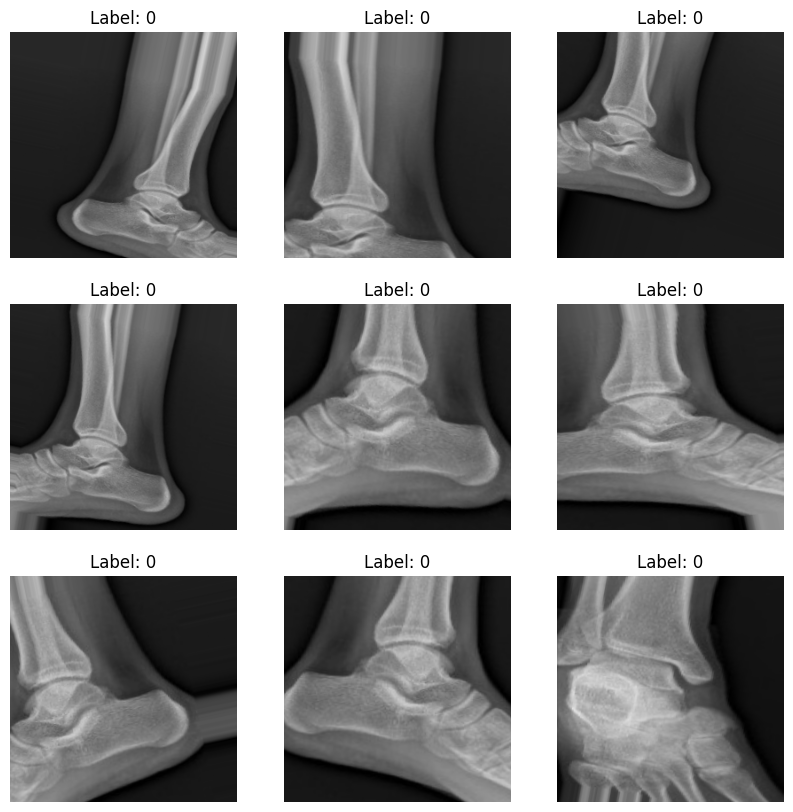

In [4]:
normal_path = "/content/drive/MyDrive/Ankle_balance/normal"
ill_path = "/content/drive/MyDrive/Ankle_balance/ill"
dataset_images = []
dataset_labels = []
dataset_file_names = []

# Reading images from the normal directory
for files in os.listdir(normal_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(normal_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images (InceptionV3 input size)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(0)  # Label for healthy images
            dataset_file_names.append(files)

# Reading images from the ill directory
for files in os.listdir(ill_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(ill_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images (InceptionV3 input size)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(1)  # Label for ill images
            dataset_file_names.append(files)

# Convert the lists to NumPy arrays
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)
dataset_file_names = np.array(dataset_file_names)

# Normalize pixel values to the range [0, 1]
dataset_images = dataset_images / 255.0

# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images and labels
augmented_images = []
augmented_labels = []

for i in range(len(dataset_images)):
    img = dataset_images[i]
    label = dataset_labels[i]

    # Reshape the image to (1, height, width, channels) as required by the flow method
    img = img.reshape((1,) + img.shape)

    # Generate augmented images
    augmented = datagen.flow(img, batch_size=1)

    # Append the augmented images and labels to the lists
    for _ in range(4):  # You can adjust the number of augmented images per original image
        augmented_images.append(augmented.next()[0])
        augmented_labels.append(label)

# Convert the augmented data to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)
seed=42
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    augmented_images, augmented_labels, test_size=0.2, random_state=seed
)

# Print the total number of images in the dataset
total_dataset_images = len(dataset_images)
print("Total number of images in the dataset:", total_dataset_images)

# Print the number of images in the training set
num_train_images = len(X_train)
print("Number of images in the training set:", num_train_images)

# Print the number of images in the testing set
num_test_images = len(X_test)
print("Number of images in the testing set:", num_test_images)

# Visualize some augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis("off")
    plt.title("Label: {}".format(augmented_labels[i]))

# Print the names and whether they belong to the training or testing set
print("\nTrain file names:")
for file_name in dataset_file_names[:num_train_images]:
    print(file_name, "- Train")

print("\nTest file names:")
for file_name in dataset_file_names[num_train_images:]:
    print(file_name, "- Test")

Epoch 1/15
15/15 [==============================] - 105s 7s/step - loss: 0.6681 - accuracy: 0.5935 - val_loss: 0.6045 - val_accuracy: 0.6724
Epoch 2/15
15/15 [==============================] - 95s 6s/step - loss: 0.4929 - accuracy: 0.7804 - val_loss: 0.5370 - val_accuracy: 0.7414
Epoch 3/15
15/15 [==============================] - 122s 8s/step - loss: 0.4354 - accuracy: 0.8000 - val_loss: 0.5070 - val_accuracy: 0.7586
Epoch 4/15
15/15 [==============================] - 96s 7s/step - loss: 0.3971 - accuracy: 0.8457 - val_loss: 0.5283 - val_accuracy: 0.7586
Epoch 5/15
15/15 [==============================] - 96s 6s/step - loss: 0.3592 - accuracy: 0.8587 - val_loss: 0.4849 - val_accuracy: 0.7586
Epoch 6/15
15/15 [==============================] - 100s 7s/step - loss: 0.3410 - accuracy: 0.8565 - val_loss: 0.4555 - val_accuracy: 0.7759
Epoch 7/15
15/15 [==============================] - 96s 7s/step - loss: 0.3162 - accuracy: 0.8783 - val_loss: 0.4597 - val_accuracy: 0.7931
Epoch 8/15
15/15 

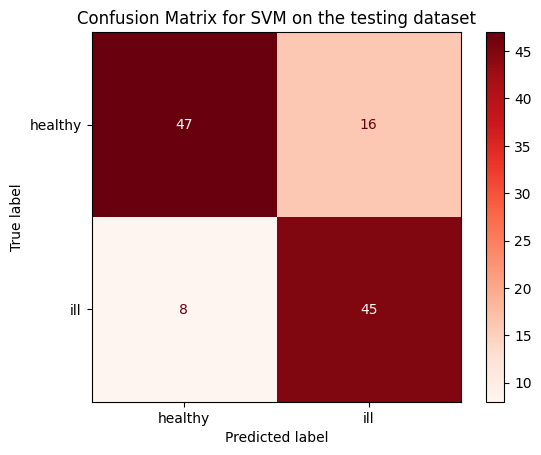

In [5]:
# Create an InceptionV3 model for feature extraction
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the InceptionV3-based model on the training dataset
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Extract features from the InceptionV3-based model for both training and testing datasets
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Apply Principal Component Analysis (PCA) to reduce dimensionality
n_components = min(X_train_features.shape[0], X_train_features.shape[1])  # Set it to the minimum
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

# Define the fixed hyperparameters for SVM
C_fixed = 1
class_weight_fixed = None
gamma_fixed = 'scale'
kernel_fixed = 'sigmoid'

# Create the SVM classifier with fixed hyperparameters
svm_classifier = SVC(C=C_fixed, class_weight=class_weight_fixed, gamma=gamma_fixed, kernel=kernel_fixed)

# Train the SVM model on the training dataset with PCA features
svm_classifier.fit(X_train_pca, y_train)

# Predict on the testing dataset
y_test_pred = svm_classifier.predict(X_test_pca)

# Generate classification report for the testing dataset
test_report = classification_report(y_test, y_test_pred)
print("Classification Report for SVM on the testing dataset:\n", test_report)

# Calculate the confusion matrix for the testing dataset
test_cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix for the testing dataset
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["healthy", "ill"])
test_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix for SVM on the testing dataset")
plt.show()

Classification Report for SVM on the training dataset:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       225
           1       0.97      0.95      0.96       235

    accuracy                           0.96       460
   macro avg       0.96      0.96      0.96       460
weighted avg       0.96      0.96      0.96       460



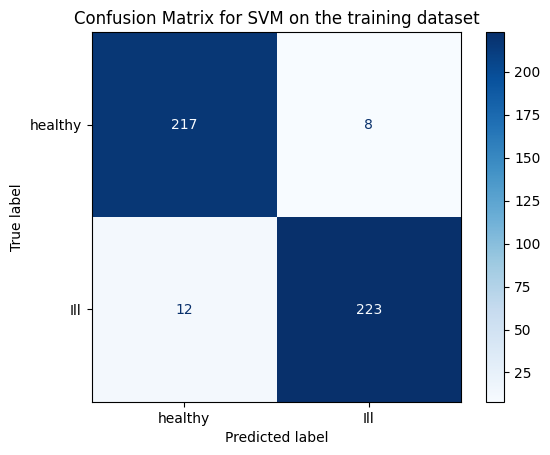

In [6]:
# Predict on the training dataset using the best SVM classifier with PCA features
y_train_pred = svm_classifier.predict(X_train_pca)

# Generate classification report for the training dataset
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for SVM on the training dataset:\n", train_report)

# Calculate the confusion matrix for the training dataset
train_cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix for the training dataset
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["healthy", "Ill"])
train_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the training dataset")
plt.show()

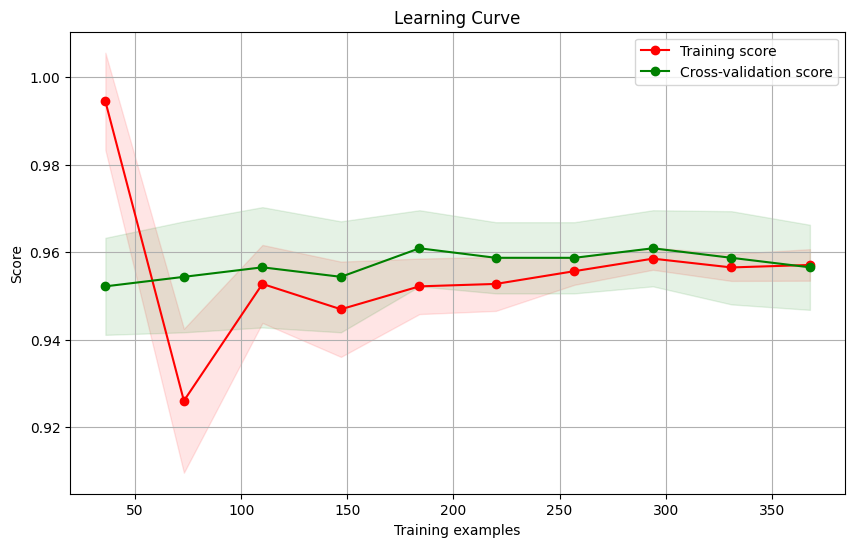

In [7]:
from sklearn.model_selection import learning_curve

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_classifier, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

AUC on Testing Dataset: 0.88


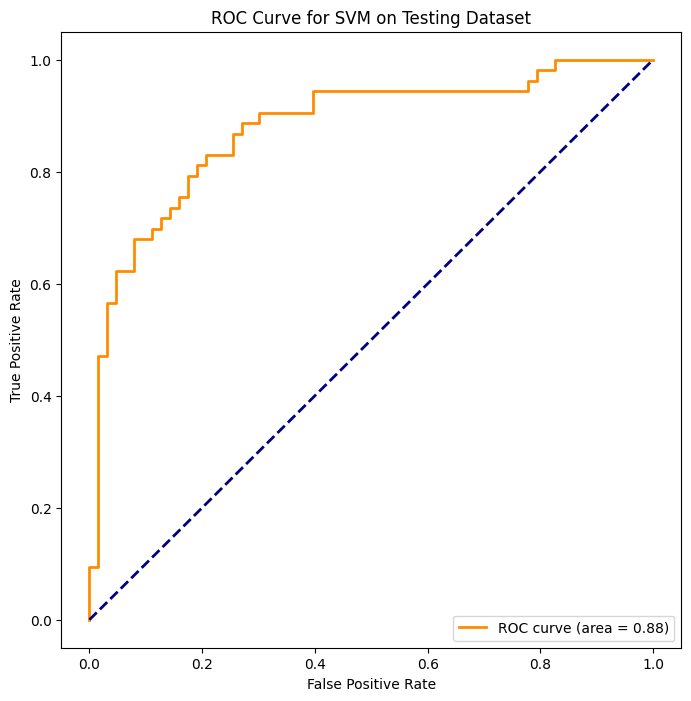

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Predict on the testing dataset
y_test_pred = svm_classifier.predict(X_test_pca)

# Calculate the probability scores for ROC-AUC
y_test_prob = svm_classifier.decision_function(X_test_pca)

# Calculate AUC
roc_auc_test = roc_auc_score(y_test, y_test_prob)

print("AUC on Testing Dataset: {:.2f}".format(roc_auc_test))

# Generate ROC curve for the testing dataset
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM on Testing Dataset')
plt.legend(loc="lower right")
plt.show()



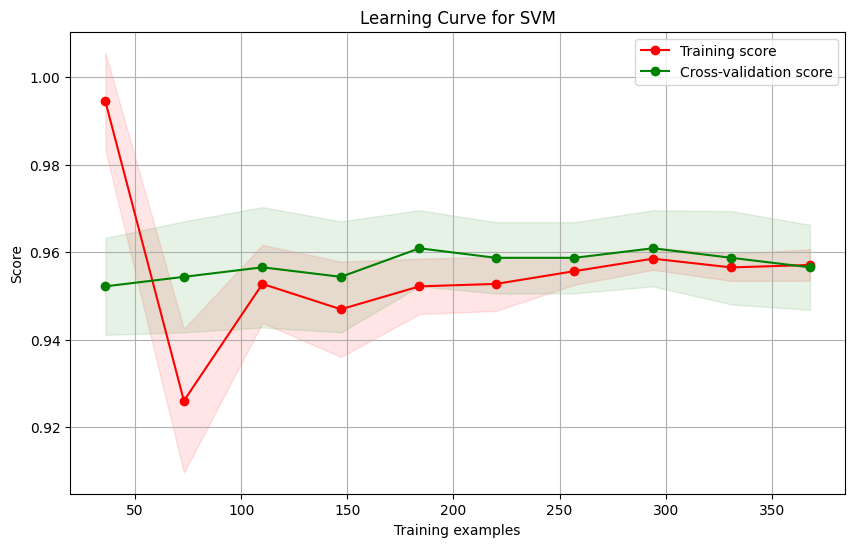

In [17]:
from sklearn.model_selection import learning_curve

# ... (previous code remains the same)

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_classifier, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy", n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve for SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

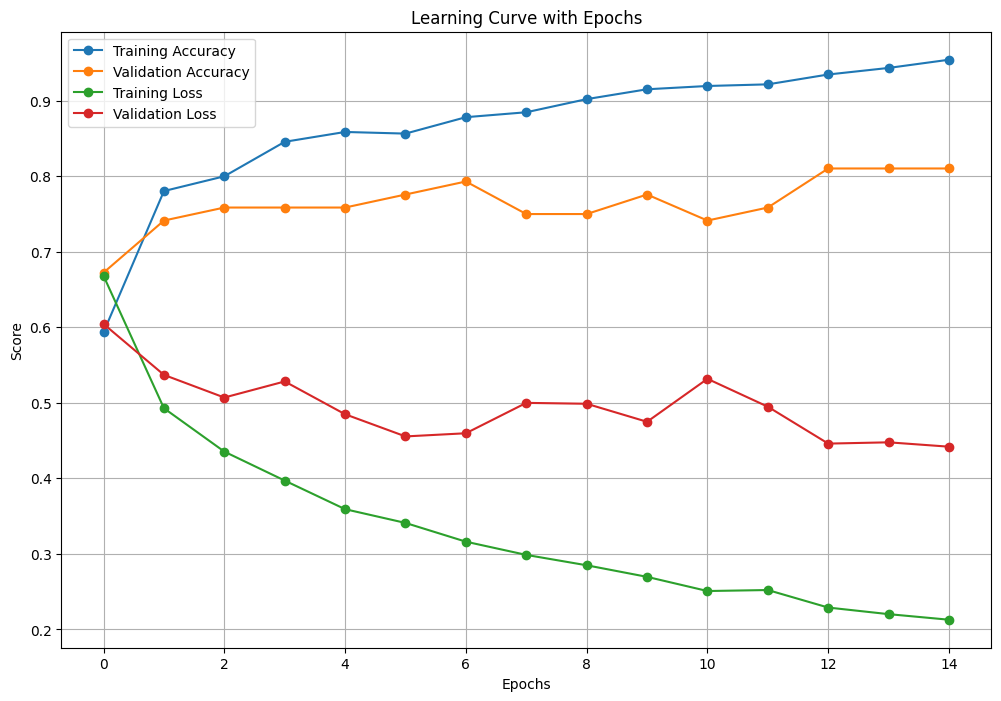

In [18]:
# Plot the learning curve with epochs
plt.figure(figsize=(12, 8))
plt.title("Learning Curve with Epochs")
plt.xlabel("Epochs")
plt.ylabel("Score")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')

plt.legend()
plt.grid()
plt.show()

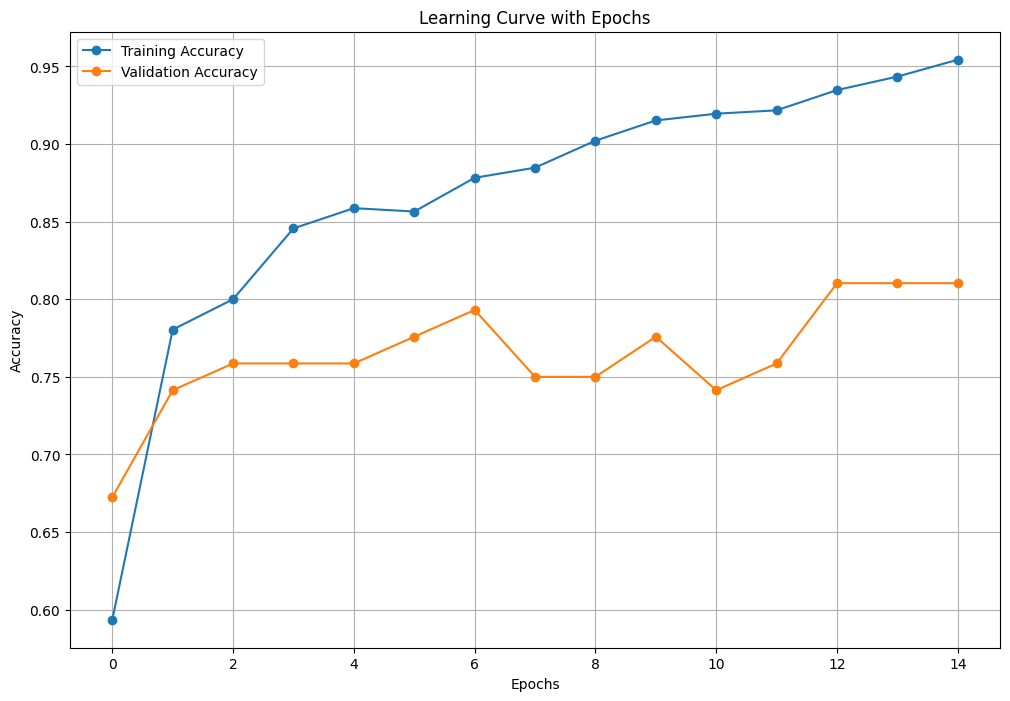

In [20]:
plt.figure(figsize=(12, 8))
plt.title("Learning Curve with Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.legend()
plt.grid()
plt.show()